## Sentiment Analysis using Vader and Text Blob

*Author : Ayesha Khatib*

### Import the packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from pandas import Series, DataFrame
from textblob import TextBlob as tb
from matplotlib import style

### Sentiment analysis has two approaches : 
1. Polarity-based which provides the result as 'positive' (1), 'negative' (-1) and 'neutral' (0) as the output.
2. Valence-based which uses lexicon to provide ratings or weigtage to sentiment words and provides four scores : pos,neg,neu and compound.
*(Compound is final score which is the sum of all the lexicon ratings and is standardised to range between -1 or 1)*

#### Below are some examples of how both works.

In [394]:
sentence1 = "The Bitcoin price has gone UP, time to SELL :)" # HIGH POSITIVE
sentence2 = "WOW!!! There is a Sale in the nearby shopping centre." # POSITIVE to NEUTRAL
sentence3 = 'The Airline XYZ is horrible, got delayed and OMG no apologies from the staff.' # HIGH NEGATIVE

In [395]:
# Import the packages for Vader sentiment analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [396]:
def vd_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print(str(snt))

In [397]:
print(vd_sentiment_scores(sentence1))
print('')
print(vd_sentiment_scores(sentence2))
print('')
print(vd_sentiment_scores(sentence3))

{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588}
None

{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.7513}
None

{'neg': 0.409, 'neu': 0.591, 'pos': 0.0, 'compound': -0.765}
None


In [398]:
# Import the packages for Textblob sentiment analysis

from textblob import TextBlob 

In [399]:
def tb_analyze_sentiment(text):
        analysis = TextBlob(text)
        #sentiment= None
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [400]:
print(tb_analyze_sentiment(sentence1))
print()
print(tb_analyze_sentiment(sentence2))
print()
print(tb_analyze_sentiment(sentence3))

positive

positive

negative


### Findings ::

- Both ouputs are giving similar results but little surpised by VADER, giving sentence 1 as not that High positive, inspite having a capital and happy emoticon in it.

### Sentiment analysis using Text blob

- TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.
https://textblob.readthedocs.io/en/dev/

- TextBlob can do more than text analysis like language translation, Part-of-speech tagging, Tokenization (splitting text into words and sentences) etc. 

### Installation of TextBlob :
pip install -U textblob

$ python -m textblob.download_corpora

### Load the csv

In [463]:
# Add a new column as sentiment with zero values.
df_textBlob = pd.read_csv('./tweets_concat_result_1stDec_updated.csv') # 1/12/2018

In [464]:
#df_sent.drop('Unnamed: 0',axis=1,inplace=True)
df_textBlob.head()

,tweets,id,len,date,source,likes,retweets
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,1.060000e+18,91,4/11/2018 21:10,Twitter Web Client,396,157
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,1.060000e+18,140,1/11/2018 19:14,Twitter Web Client,0,42
2,RT @HelloVoltaire: You can now use @handcashap...,1.060000e+18,140,31/10/2018 20:12,Twitter Web Client,0,49
3,"""The behemoth cryptocurrency exchange Coinbase...",1.060000e+18,140,31/10/2018 16:25,TweetDeck,117,44
4,Pandacash is a “one-click” Bitcoin Cash blockc...,1.060000e+18,140,31/10/2018 15:24,TweetDeck,58,36


In [465]:
df_textBlob.dtypes

tweets       object
id          float64
len           int64
date         object
source       object
likes         int64
retweets      int64
dtype: object

In [466]:
df_textBlob['tweets'][0]

'Bitcoin Cash Continues to Skyrocket 15% to $535, Volume Quintuples\r\r\r\r\n\r\r\r\r\nhttps://t.co/9RJsrlbHL2'

### For Sentiment value based on Sentiment polarity

In [467]:
# Add a new column as sentiment with zero values.
df_textBlob['sentiment'] = 0
df_textBlob['sentiment_value'] = 0

In [468]:
df_textBlob.head()

,tweets,id,len,date,source,likes,retweets,sentiment,sentiment_value
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,1.060000e+18,91,4/11/2018 21:10,Twitter Web Client,396,157,0,0
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,1.060000e+18,140,1/11/2018 19:14,Twitter Web Client,0,42,0,0
2,RT @HelloVoltaire: You can now use @handcashap...,1.060000e+18,140,31/10/2018 20:12,Twitter Web Client,0,49,0,0
3,"""The behemoth cryptocurrency exchange Coinbase...",1.060000e+18,140,31/10/2018 16:25,TweetDeck,117,44,0,0
4,Pandacash is a “one-click” Bitcoin Cash blockc...,1.060000e+18,140,31/10/2018 15:24,TweetDeck,58,36,0,0


In [469]:
df_textBlob.shape

(1113, 9)

In [470]:
import re 

class TweetAnalyzer():
    
    # Functionality for analyzing and categorizing content from tweets.
    
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

    def analyze_sentiment(self, tweet):
        analysis = TextBlob(self.clean_tweet(tweet))
        #sentiment= None
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
        
    def analyze_sentiment_value(self, tweet):
        analysis_val = TextBlob(self.clean_tweet(tweet))
        #sentiment= None
        if analysis_val.sentiment.polarity > 0:
            return 1
        elif analysis_val.sentiment.polarity == 0:
            return 0
        else:
            return -1
        

    def tweets_to_data_frame(self, tweets):
        #df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])

        df['sentiment'] = np.array([tweet.id for tweet in tweets])
        df['sentiment_value'] = np.array([tweet.id for tweet in tweets])

In [471]:
tweet_analyzer = TweetAnalyzer()
#df = tweet_analyzer.tweets_to_data_frame(tweets)
df_textBlob['sentiment'] = np.array([tweet_analyzer.analyze_sentiment(tweet) for tweet in df_textBlob['tweets']])
df_textBlob['sentiment_value'] = np.array([tweet_analyzer.analyze_sentiment_value(tweet) for tweet in df_textBlob['tweets']])

In [472]:
df_textBlob.head()

,tweets,id,len,date,source,likes,retweets,sentiment,sentiment_value
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,1.060000e+18,91,4/11/2018 21:10,Twitter Web Client,396,157,neutral,0
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,1.060000e+18,140,1/11/2018 19:14,Twitter Web Client,0,42,negative,-1
2,RT @HelloVoltaire: You can now use @handcashap...,1.060000e+18,140,31/10/2018 20:12,Twitter Web Client,0,49,neutral,0
3,"""The behemoth cryptocurrency exchange Coinbase...",1.060000e+18,140,31/10/2018 16:25,TweetDeck,117,44,positive,1
4,Pandacash is a “one-click” Bitcoin Cash blockc...,1.060000e+18,140,31/10/2018 15:24,TweetDeck,58,36,positive,1


In [473]:
df_textBlob.shape

(1113, 9)

In [474]:
# Save the file
df_textBlob.to_csv('tweets_textblob_sentiments.csv', sep=',',encoding='utf-8' )

## VADER : *V*alence *A*ware *D*ictionary for S*e*ntiment *R*easoning

---
- Vader is one of the approach to perform Sentiment analysis for a given text and results 'positive', 'negative','neutral' and 'compound' ratings.
- Vader is lexicon-based (dictionary-based) sentiment analysis approach.
- Unlike polarity based analysis where for example, says excellent and good have positive sentiment but in Vader it would say excellent has higher positive rating than good, lets say 1.9 and 1.8 positive score respectively. The advantage of such analysis proves to provide a precise resultant sentiment rating.
- Compound score is sum of all lexicon ratings which has been standardised to a range between -1 and 1.

#### Firstly install through command line :: 

pip install vaderSentiment

In [475]:
# Add a new column as sentiment with zero values.
df = pd.read_csv('./tweets_concat_result_1stDec_updated.csv') # 1/12/2018

In [477]:
df.head(2)

,tweets,id,len,date,source,likes,retweets
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,1.060000e+18,91,4/11/2018 21:10,Twitter Web Client,396,157
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,1.060000e+18,140,1/11/2018 19:14,Twitter Web Client,0,42


In [480]:
# Initialise empty lists to store results
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []
tweet=[]

# For loop to iterate over the columns data and calculate the Vader sentiments scores.

for i in range(0, len(df)):
    #print(i)
    tweet.append(df['tweets'][i])
    vs_compound.append(analyzer.polarity_scores(df['tweets'][i])['compound'])
    vs_pos.append(analyzer.polarity_scores(df['tweets'][i])['pos'])
    vs_neu.append(analyzer.polarity_scores(df['tweets'][i])['neu'])
    vs_neg.append(analyzer.polarity_scores(df['tweets'][i])['neg'])

In [482]:
# Put all data in a dataframe.

df_vader = pd.DataFrame({'Tweets':tweet,'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
df_vader = df_vader[['Tweets','Compound','Positive', 'Neutral', 'Negative']]

# Have a look at the top 5 results.
df_vader.head()

,Tweets,Compound,Positive,Neutral,Negative
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,0.0000,0.000,1.000,0.0
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,0.0000,0.000,1.000,0.0
2,RT @HelloVoltaire: You can now use @handcashap...,0.0000,0.000,1.000,0.0
3,"""The behemoth cryptocurrency exchange Coinbase...",0.4404,0.139,0.861,0.0
4,Pandacash is a “one-click” Bitcoin Cash blockc...,0.8360,0.357,0.643,0.0


### Combine the textBlob and Vader Sentiment analysis dataframe

In [483]:
df_vader.head()

,Tweets,Compound,Positive,Neutral,Negative
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,0.0000,0.000,1.000,0.0
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,0.0000,0.000,1.000,0.0
2,RT @HelloVoltaire: You can now use @handcashap...,0.0000,0.000,1.000,0.0
3,"""The behemoth cryptocurrency exchange Coinbase...",0.4404,0.139,0.861,0.0
4,Pandacash is a “one-click” Bitcoin Cash blockc...,0.8360,0.357,0.643,0.0


In [484]:
df_textBlob.head()

,tweets,id,len,date,source,likes,retweets,sentiment,sentiment_value
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,1.060000e+18,91,4/11/2018 21:10,Twitter Web Client,396,157,neutral,0
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,1.060000e+18,140,1/11/2018 19:14,Twitter Web Client,0,42,negative,-1
2,RT @HelloVoltaire: You can now use @handcashap...,1.060000e+18,140,31/10/2018 20:12,Twitter Web Client,0,49,neutral,0
3,"""The behemoth cryptocurrency exchange Coinbase...",1.060000e+18,140,31/10/2018 16:25,TweetDeck,117,44,positive,1
4,Pandacash is a “one-click” Bitcoin Cash blockc...,1.060000e+18,140,31/10/2018 15:24,TweetDeck,58,36,positive,1


In [486]:
twitter_df = df_textBlob.copy()

In [487]:
twitter_df.head()

,tweets,id,len,date,source,likes,retweets,sentiment,sentiment_value
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,1.060000e+18,91,4/11/2018 21:10,Twitter Web Client,396,157,neutral,0
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,1.060000e+18,140,1/11/2018 19:14,Twitter Web Client,0,42,negative,-1
2,RT @HelloVoltaire: You can now use @handcashap...,1.060000e+18,140,31/10/2018 20:12,Twitter Web Client,0,49,neutral,0
3,"""The behemoth cryptocurrency exchange Coinbase...",1.060000e+18,140,31/10/2018 16:25,TweetDeck,117,44,positive,1
4,Pandacash is a “one-click” Bitcoin Cash blockc...,1.060000e+18,140,31/10/2018 15:24,TweetDeck,58,36,positive,1


In [488]:
# Drop the columns not required for further manipulation.
drop_cols = ['id','source']

twitter_df.drop(drop_cols,axis=1,inplace=True)

In [ ]:
# Add the columns from Vader dataframe.

twitter_df['Compound'] = df_vader['Compound']
twitter_df['Positive'] = df_vader['Positive']
twitter_df['Neutral'] = df_vader['Neutral']
twitter_df['Negative'] = df_vader['Negative']

In [494]:
# Print the head
twitter_df.head()

,tweets,len,date,likes,retweets,sentiment,sentiment_value,Compound,Positive,Neutral,Negative
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,91,4/11/2018 21:10,396,157,neutral,0,0.0000,0.000,1.000,0.0
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,140,1/11/2018 19:14,0,42,negative,-1,0.0000,0.000,1.000,0.0
2,RT @HelloVoltaire: You can now use @handcashap...,140,31/10/2018 20:12,0,49,neutral,0,0.0000,0.000,1.000,0.0
3,"""The behemoth cryptocurrency exchange Coinbase...",140,31/10/2018 16:25,117,44,positive,1,0.4404,0.139,0.861,0.0
4,Pandacash is a “one-click” Bitcoin Cash blockc...,140,31/10/2018 15:24,58,36,positive,1,0.8360,0.357,0.643,0.0


In [498]:
twitter_df.dtypes

tweets              object
len                  int64
date                object
likes                int64
retweets             int64
sentiment           object
sentiment_value      int32
Compound           float64
Positive           float64
Neutral            float64
Negative           float64
dtype: object

In [500]:
twitter_df.sentiment_value=twitter_df.sentiment_value.astype(np.float64)
#pd.to_numeric(twitter_df.sentiment_value, downcast='float')
twitter_df.dtypes

tweets              object
len                  int64
date                object
likes                int64
retweets             int64
sentiment           object
sentiment_value    float64
Compound           float64
Positive           float64
Neutral            float64
Negative           float64
dtype: object

In [502]:
# Save the file
twitter_df.to_csv('tweets_textblob_vader_sentiments.csv', sep=',',encoding='utf-8' )

### Visualisation ::

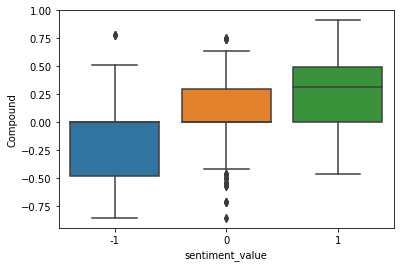

<Figure size 1440x1080 with 0 Axes>

In [495]:
ax = sns.boxplot( x= twitter_df["sentiment_value"], y = twitter_df["Compound"])
plt.figure(figsize=(12,9))
plt.show()

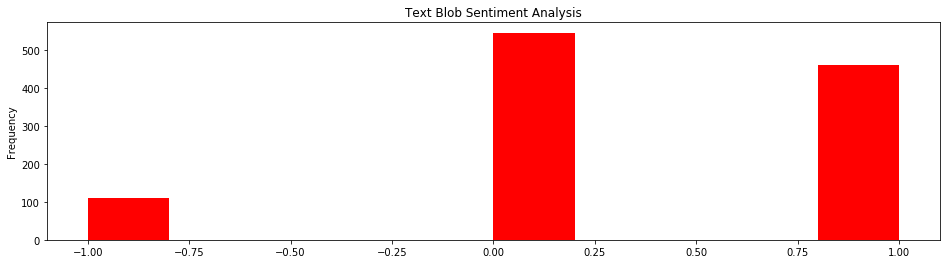

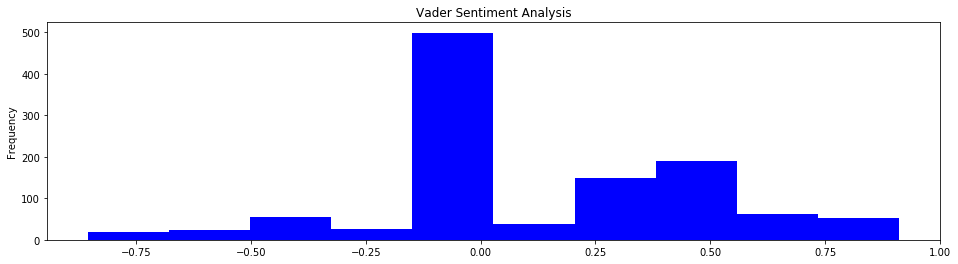

In [497]:
time_tb = pd.Series(data=twitter_df['sentiment_value'].values, index=twitter_df['date'])
time_tb.plot(kind='hist',figsize=(16, 4), color='r',title = 'Text Blob Sentiment Analysis')
plt.show()
    
time_vd = pd.Series(data=twitter_df['Compound'].values, index=twitter_df['date'])
time_vd.plot(kind='hist',figsize=(16, 4), color='b', title = 'Vader Sentiment Analysis')
plt.show()

In [503]:
twitter_df.head(2)

,tweets,len,date,likes,retweets,sentiment,sentiment_value,Compound,Positive,Neutral,Negative
0,Bitcoin Cash Continues to Skyrocket 15% to $53...,91,4/11/2018 21:10,396,157,neutral,0.0,0.0,0.0,1.0,0.0
1,RT @CoinSpice: Leaders in the #BCH space @ryan...,140,1/11/2018 19:14,0,42,negative,-1.0,0.0,0.0,1.0,0.0


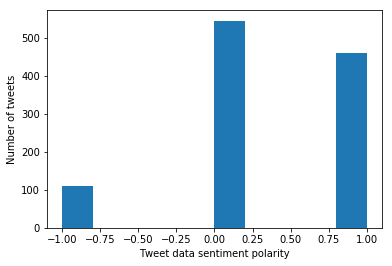

In [504]:
import matplotlib.pyplot as plt

twitter_df['sentiment_value'].plot(kind='hist')
plt.xlabel('Tweet data sentiment polarity')
plt.ylabel('Number of tweets')
plt.show()

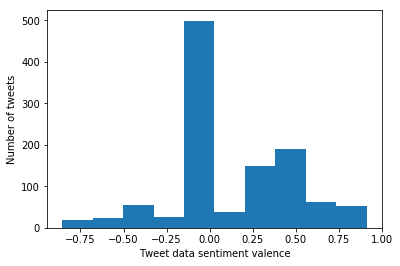

In [517]:
twitter_df['Compound'].plot(kind='hist')
plt.xlabel('Tweet data sentiment valence')
plt.ylabel('Number of tweets')
plt.show()

## Conclusion ::

- The Vader sentiment analysis would give a comparative precise sentiment analysis of the Twitter data than Text blob.
- Also, taking into consideration that the data isn't clean but Vader works well with exclaimation, emoticon, captilisation than TextBlob. Hence, I would repeat this after the data cleaning process.